In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class KF:
    def __init__(self, init_x:float, init_v:float, acceleration_var: float):
        #init state variables
        #mean
        self.x = np.array([init_x, init_v])

        #uncertainty covariance matrix
        #np.eye returns identity matrix
        self.P = np.eye(2)
        self.acceleration_var = acceleration_var

    def predict(self, dt:float):
        #state transistion matrix
        F = np.array([[1, dt],
                      [0, 1]]) 
        new_x = F.dot(self.x)

        G = np.array([.5 * dt**2, dt]).reshape((2, 1))
        new_P = F.dot(self.P).dot(F.T) + G.dot(G.T) * self.acceleration_var

        self.P = new_P
        self.x = new_x

    def update(self, measurement_value:float, measurement_var:float):
        pass
        

    @property
    def pos(self):
        return self.x[0]
    
    @property
    def vel(self):
        return self.x[1]


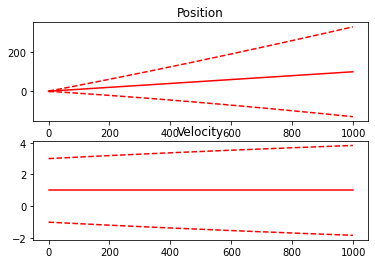

In [25]:
plt.ion()
plt.figure()

kf = KF(0.0, 1.0, .1)
dt = 0.1
num_epochs = 1000

mus = list()
covs = list()

for epoch in range(num_epochs):
    covs.append(kf.P)
    mus.append(kf.x)
    kf.predict(dt)

plt.subplot(2, 1, 1)
plt.title('Position')
plt.plot([mu[0] for mu in mus], 'r')
plt.plot([mu[0] - 2*np.sqrt(cov[0,0]) for mu, cov in zip(mus, covs)], 'r--')
plt.plot([mu[0] + 2*np.sqrt(cov[0,0]) for mu, cov in zip(mus, covs)], 'r--')

plt.subplot(2, 1, 2)
plt.title('Velocity')
plt.plot([mu[1] for mu in mus], 'r')
plt.plot([mu[1] - 2*np.sqrt(cov[1,1]) for mu, cov in zip(mus, covs)], 'r--')
plt.plot([mu[1] + 2*np.sqrt(cov[1,1]) for mu, cov in zip(mus, covs)], 'r--')
